In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
import copy , math

In [46]:
data1 = pd.read_csv('train_lin_reg_robo1.csv')
data1.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [47]:
X_train = data1['x'].to_numpy()
X_train = X_train / 100
X_train[213] = 0.3
#X_train = np.float64(X_train)
Y_train = data1['y'].to_numpy()
#Y_train = np.float64(Y_train)
Y_train = Y_train / 100
#Y_train = np.around(Y_train , decimals = 0 )

In [48]:
#W & b defined
w = 0.
b = 0.
print(w,b)

0.0 0.0


In [49]:
def cost_function(X , Y , w , b):
    m = len(X_train)
    cost = 0.
    total_cost = 0.
    for i in range(m):
        f_wb = w * X[i] + b
        cost += (f_wb - Y[i])**2
    #print(cost)
    total_cost = cost/ (2 * m) 
    #print(total_cost)
    return total_cost        

In [50]:
def grad(X , Y, w , b):
    n = len(X_train)
    dw = 0
    db = 0   
    for i in range(n):
        f = w * X[i] + b
        dw_sum = (f - Y[i]) * X[i]
        db_sum = (f - Y[i])
        dw += dw_sum
        db += db_sum
    dw = dw / n
    db = db / n
    return dw , db       
        

In [51]:
def gradient_descent(X , Y, w_in ,b_in , alpha , num_itrs , cost , grad):
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(num_itrs):
        dw, db = grad(X , Y , w , b)    
        
        w = w - alpha * dw 
        b = b - alpha * db 
        
        if i<num_itrs:
            cost = cost_function(X, Y, w, b)
            J_history.append(cost)
            
        if i%10000 == 0 or i==num_itrs-1:
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.4f} ")
            
    return w, b , J_history

In [52]:
w_in = -5
b_in = -4
alpha = 0.001
num_itrs = 100000
J_his = np.zeros(num_itrs)
w, b , J_his = gradient_descent(X_train ,Y_train, w_in, b_in, alpha, num_itrs,cost_function, grad)


Iteration    0: Cost  25.9338 
Iteration 10000: Cost   0.1025 
Iteration 20000: Cost   0.0278 
Iteration 30000: Cost   0.0078 
Iteration 40000: Cost   0.0025 
Iteration 50000: Cost   0.0010 
Iteration 60000: Cost   0.0006 
Iteration 70000: Cost   0.0005 
Iteration 80000: Cost   0.0005 
Iteration 90000: Cost   0.0005 
Iteration 99999: Cost   0.0005 


Text(0.5, 1.0, 'Loss vs. No. of ITR')

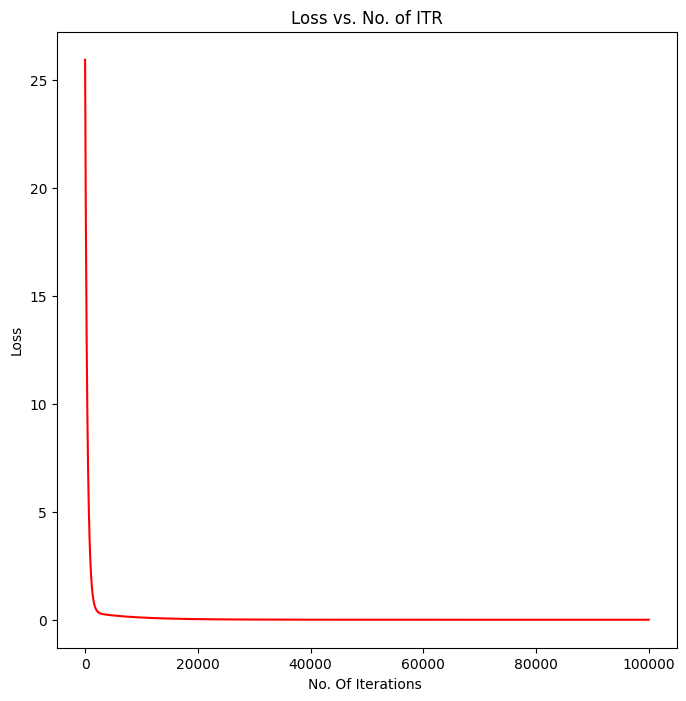

In [53]:
y_data = J_his
x_data = np.arange(0,num_itrs,1)
fig = plt.figure(1 , figsize = (8,8))
plt.plot(x_data , y_data , color = 'red')
plt.xlabel('No. Of Iterations ')
plt.ylabel('Loss')
plt.title('Loss vs. No. of ITR')

In [54]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

Text(0.5, 0, 'X_val')

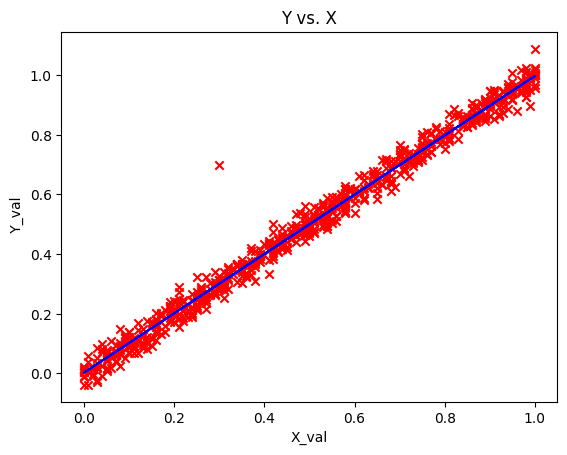

In [55]:
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, Y_train, marker='x', c='r') 

# Set the title
plt.title("Y vs. X")
# Set the y-axis label
plt.ylabel(' Y_val')
# Set the x-axis label
plt.xlabel('X_val')

Text(0.5, 0, 'X_val')

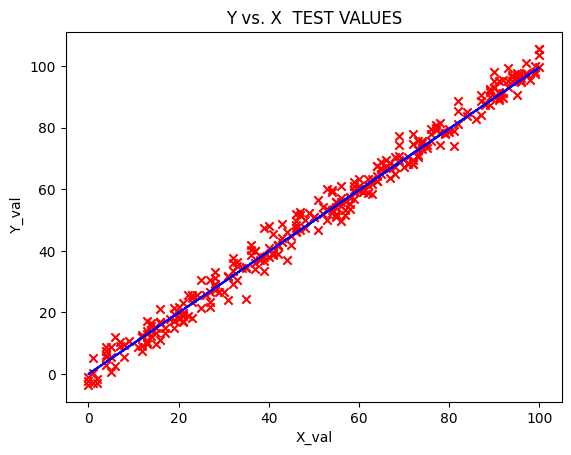

In [56]:
data2 = pd.read_csv('test_lin_reg_robo.csv')
X_test = data2['x'].to_numpy()
Y_test = data2['y'].to_numpy()

m = X_test.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_test[i] + b
plt.plot(X_test, predicted, c = "b")
plt.scatter(X_test, Y_test, marker='x', c='r') 
plt.title("Y vs. X  TEST VALUES")
plt.ylabel(' Y_val')
plt.xlabel('X_val')